In [1]:
# things to do/doubts/discussions
# model sometimes give constant loss over epochs and gives poor results on prediction
# is the loss value supposed to reduce continously
# should we do augmentation of validation data ?
# All values are already between -1 to +1. should we do scaling on top of this ?
# if we are adding scaling of data, how to ensure that when it is being tested would give out rescaled data


# how to save subclassing api
# hyperparameter tuning
# how to save the best model among all the epochs
# should we shuffle repeat, prefetch etc ?
# incase of early stopping - what metric is to be monitored - val loss or val mse ?

#observations
#load model works without regularizer and initializer being passed  as arguments during forward pass

from utility import *

# GPUs Available:  1


In [2]:
#load the data
data_size = 1000
X_train, Y_train, X_validation, Y_validation, X_test = load_data(data_size)

# defining the parameters

# loss
# Mean Squared Error
# Root Mean Squared Error
# Mean Absolute Error
# https://www.tensorflow.org/api_docs/python/tf/keras/losses
batch_size = 32
epochs = 100
# steps_per_epoch = sum(train_occurences) / batch_size
starter_learning_rate = 1e-1
end_learning_rate = 1e-8
decay_steps = epochs * 3
# loss = tf.keras.losses.MeanAbsoluteError()
# loss = tf.keras.losses.MeanSquaredError()
# loss = 'mean_squared_error'
metrics = tf.keras.metrics.MeanSquaredError()
scheduler = tf.keras.optimizers.schedules.PolynomialDecay(initial_learning_rate= starter_learning_rate,
    decay_steps= decay_steps,
    end_learning_rate= end_learning_rate,
    power=1)
# scheduler = 0.01
# optimizer=tf.keras.optimizers.Adam(learning_rate=scheduler)
kernel_regularizer=tf.keras.regularizers.L1L2(0.01)
callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_squared_error',patience=20)]
initializer=tf.keras.initializers.HeUniform()

verbose=2

# generating augmented data
X_train_Aug, Y_train_Aug = data_augmentation(X_train, Y_train)

1000 rowed data loaded


In [3]:
class Hidden_layer(layers.Layer):
    def __init__(self,units, **kwargs):
        super(Hidden_layer, self).__init__(**kwargs)
        self.units = units

    def build(self, input_shape):
        self.W = self.add_weight(name = 'w',shape=(input_shape[-1],self.units), initializer=tf.keras.initializers.HeUniform(),
                                 trainable=True, regularizer=tf.keras.regularizers.L1L2(0.01))

    def call(self, inputs):
        x = tf.keras.activations.relu(tf.matmul(inputs, self.W))
        return x
    def get_config(self):
        config = super(Hidden_layer, self).get_config()
        config.update({"units": self.units})
        # config.update({"initializer": initializer})
        # config.update({"kernel_regularizer": kernel_regularizer})
        return config
        # return {"units": self.units, "kernel_regularizer": kernel_regularizer, "initializer": initializer}
    # @classmethod
    # def from_config(cls, config):
    #     return cls(**config)
        
class Output_layer(layers.Layer):
    def __init__(self, units, **kwargs):
        super(Output_layer, self).__init__(**kwargs)
        self.units = units

    def build(self, input_shape):
        self.W = self.add_weight(name = 'w',shape=(input_shape[-1],self.units), initializer=tf.keras.initializers.HeUniform(),
                                 trainable=True, regularizer=tf.keras.regularizers.L1L2(0.01))

    def call(self, inputs):
        x = tf.matmul(inputs, self.W)
        return tf.keras.activations.tanh(x)
    def get_config(self):
        config = super(Output_layer, self).get_config()
        config.update({"units": self.units})
        # config.update({"initializer": initializer})
        # config.update({"kernel_regularizer": kernel_regularizer})
        return config
        # return {"units": self.units, "kernel_regularizer": kernel_regularizer, "initializer": initializer}
    # @classmethod
    # def from_config(cls, config):
    #     return cls(**config)

# class MyReLU(layers.Layer):
#     def __init__(self):
#         super(MyReLU, self).__init__()

#     def call(self, x):
#         return tf.math.maximum(x, 0)

In [4]:
# NN Model 
class NNmodel():
    def model():
        model = tf.keras.models.Sequential()
        model.add(Hidden_layer(4))
        model.add(Output_layer(2))
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=scheduler),
                    loss = [tf.keras.losses.MeanAbsoluteError()],
                    metrics = tf.keras.metrics.MeanSquaredError()
        )
        return model

Epoch 1/100
32/32 - 0s - loss: 0.4308 - mean_squared_error: 0.1672 - val_loss: 0.2851 - val_mean_squared_error: 0.0275 - 443ms/epoch - 14ms/step
Epoch 2/100
32/32 - 0s - loss: 0.2753 - mean_squared_error: 0.0223 - val_loss: 0.2763 - val_mean_squared_error: 0.0241 - 99ms/epoch - 3ms/step
Epoch 3/100
32/32 - 0s - loss: 0.2642 - mean_squared_error: 0.0208 - val_loss: 0.2932 - val_mean_squared_error: 0.0269 - 100ms/epoch - 3ms/step
Epoch 4/100
32/32 - 0s - loss: 0.2647 - mean_squared_error: 0.0204 - val_loss: 0.2577 - val_mean_squared_error: 0.0180 - 122ms/epoch - 4ms/step
Epoch 5/100
32/32 - 0s - loss: 0.2615 - mean_squared_error: 0.0204 - val_loss: 0.2882 - val_mean_squared_error: 0.0266 - 156ms/epoch - 5ms/step
Epoch 6/100
32/32 - 0s - loss: 0.2599 - mean_squared_error: 0.0198 - val_loss: 0.2612 - val_mean_squared_error: 0.0188 - 105ms/epoch - 3ms/step
Epoch 7/100
32/32 - 0s - loss: 0.2594 - mean_squared_error: 0.0201 - val_loss: 0.2985 - val_mean_squared_error: 0.0309 - 103ms/epoch - 3

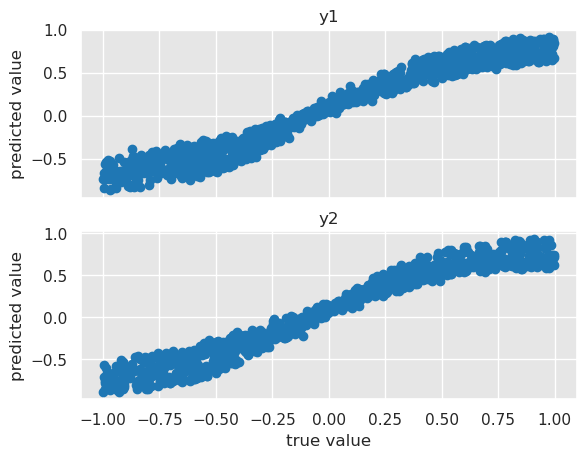

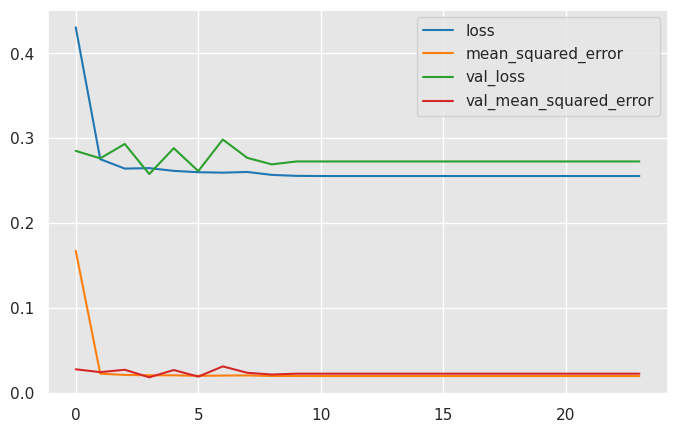

1/1 [==============================] - 0s 17ms/step
[[ 0.09880889  0.09818863]
 [-0.2934393   0.47635498]
 [-0.2873247  -0.30222562]
 [ 0.46258118 -0.31063375]
 [ 0.45731619  0.46914944]
 [-0.46451589  0.62192309]
 [ 0.60520439 -0.48623909]
 [-0.52509309  0.67073919]
 [ 0.60520439 -0.48623909]
 [-0.4566242  -0.47553896]]


In [15]:
# Model 1 - NN fitting with Normal data
model = NNmodel.model()
history = model.fit(X_train, Y_train, 
                    epochs=epochs, 
                    batch_size= batch_size, 
                    verbose=verbose, 
                    validation_data=(X_validation, Y_validation),
                    callbacks=callbacks,
                    # shuffle=True
                    )  
model_eval(model, history, X_validation, Y_validation, X_train, Y_train, batch_size, X_test)
model.save('NN_1000_normal.h5')

32/32 [==============================] - 0s 2ms/step
rmse of y1:  0.1491587619104656
rmse of y2:  0.14939759953753629
1/1 [==============================] - 0s 17ms/step
[[ 0.09880889  0.09818863]
 [-0.2934393   0.47635498]
 [-0.2873247  -0.30222562]
 [ 0.46258118 -0.31063375]
 [ 0.45731619  0.46914944]
 [-0.46451589  0.62192309]
 [ 0.60520439 -0.48623909]
 [-0.52509309  0.67073919]
 [ 0.60520439 -0.48623909]
 [-0.4566242  -0.47553896]]


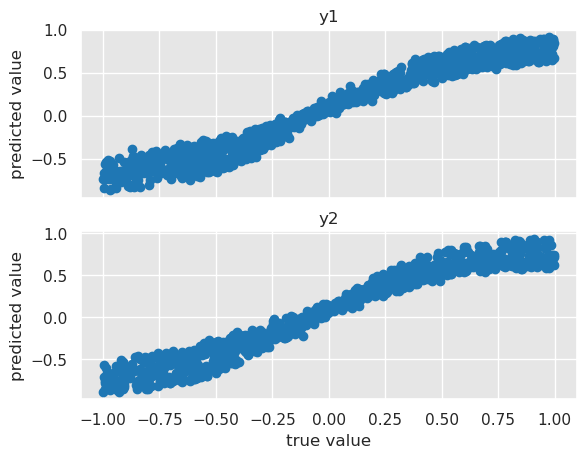

In [16]:
model.get_config()
# models = ['NN_1000_normal.h5','NN_1000_Aug.h5','ENN_1000_normal.h5','ENN_1000_Aug.h5', ]
# for model in models:
from keras.utils import CustomObjectScope

with CustomObjectScope({'Hidden_layer':Hidden_layer, 'Output_layer':Output_layer}):
       #soln 1
       # load_model = tf.keras.models.load_model('NN_1000_normal.h5', compile=False)
       load_model = tf.keras.models.load_model('NN_1000_normal.h5')
       
predictions = load_model.predict(X_validation)
prediction_accuracy(predictions, Y_validation)
evaluate_train = load_model.evaluate(X_train, Y_train, batch_size=batch_size)

# evaluate_train = model.evaluate(X_train, Y_train, batch_size=batch_size)
evaluate_validation = load_model.evaluate(X_validation,Y_validation, batch_size=batch_size)

y_pred = load_model.predict(X_test)
print(y_pred)

Epoch 1/100
250/250 - 1s - loss: 0.3208 - mean_squared_error: 0.0630 - val_loss: 0.2555 - val_mean_squared_error: 0.0192 - 733ms/epoch - 3ms/step
Epoch 2/100
250/250 - 0s - loss: 0.2784 - mean_squared_error: 0.0274 - val_loss: 0.2513 - val_mean_squared_error: 0.0189 - 416ms/epoch - 2ms/step
Epoch 3/100
250/250 - 0s - loss: 0.2783 - mean_squared_error: 0.0274 - val_loss: 0.2513 - val_mean_squared_error: 0.0189 - 417ms/epoch - 2ms/step
Epoch 4/100
250/250 - 0s - loss: 0.2783 - mean_squared_error: 0.0274 - val_loss: 0.2513 - val_mean_squared_error: 0.0189 - 456ms/epoch - 2ms/step
Epoch 5/100
250/250 - 0s - loss: 0.2783 - mean_squared_error: 0.0274 - val_loss: 0.2513 - val_mean_squared_error: 0.0189 - 406ms/epoch - 2ms/step
Epoch 6/100
250/250 - 0s - loss: 0.2783 - mean_squared_error: 0.0274 - val_loss: 0.2513 - val_mean_squared_error: 0.0189 - 458ms/epoch - 2ms/step
Epoch 7/100
250/250 - 0s - loss: 0.2783 - mean_squared_error: 0.0274 - val_loss: 0.2513 - val_mean_squared_error: 0.0189 - 4

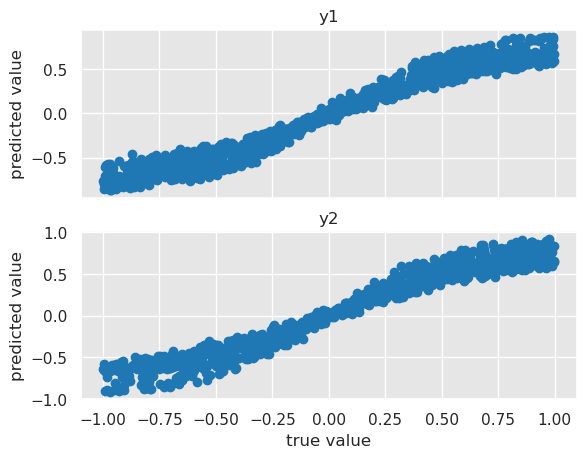

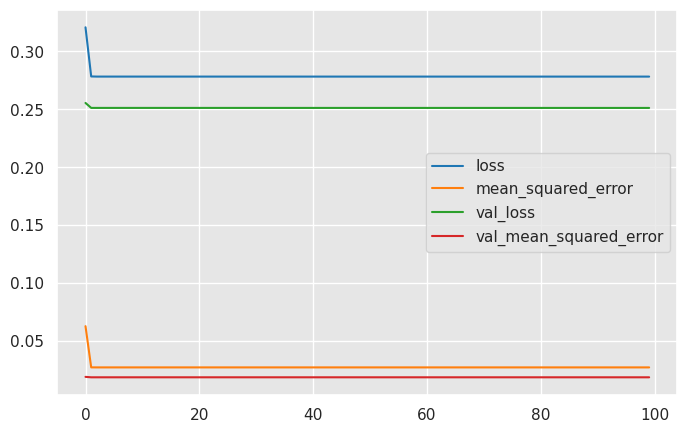

1/1 [==============================] - 0s 23ms/step
[[-0.00876676  0.01021128]
 [-0.37085155  0.38650433]
 [-0.37221134 -0.36348701]
 [ 0.35563164 -0.36899623]
 [ 0.3570089   0.38107886]
 [-0.52247034  0.54160214]
 [ 0.50960618 -0.52701032]
 [-0.57560182  0.59535097]
 [ 0.50960618 -0.52701032]
 [-0.52418859 -0.5200824 ]]


In [7]:
# Model 2 - NN fitting with Augmented data

model = NNmodel.model()
history = model.fit(X_train_Aug, Y_train_Aug,
                    epochs=epochs, 
                    batch_size= batch_size, 
                    verbose=verbose, 
                    validation_data=(X_validation, Y_validation),
                    callbacks=callbacks,
                    # shuffle=True
                    )  
model_eval(model, history, X_validation, Y_validation, X_train_Aug, Y_train_Aug, batch_size, X_test)
model.save('NN_1000_Aug.h5')

32/32 [==============================] - 0s 960us/step
rmse of y1:  0.1398198234549191
rmse of y2:  0.13476325079058823
1/1 [==============================] - 0s 18ms/step
[[-0.00876676  0.01021128]
 [-0.37085155  0.38650433]
 [-0.37221134 -0.36348701]
 [ 0.35563164 -0.36899623]
 [ 0.3570089   0.38107886]
 [-0.52247034  0.54160214]
 [ 0.50960618 -0.52701032]
 [-0.57560182  0.59535097]
 [ 0.50960618 -0.52701032]
 [-0.52418859 -0.5200824 ]]


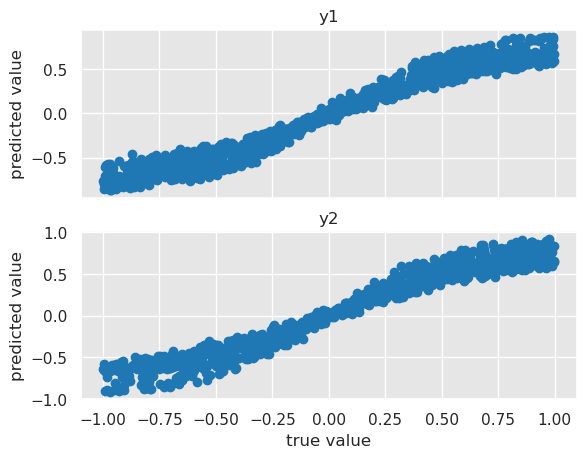

In [8]:
model.get_config()
# models = ['NN_1000_normal.h5','NN_1000_Aug.h5','ENN_1000_normal.h5','ENN_1000_Aug.h5', ]
# for model in models:
from keras.utils import CustomObjectScope

with CustomObjectScope({'Hidden_layer':Hidden_layer, 'Output_layer':Output_layer}):
       #soln 1
       # load_model = tf.keras.models.load_model('NN_1000_normal.h5', compile=False)
       load_model = tf.keras.models.load_model('NN_1000_Aug.h5')
       
predictions = load_model.predict(X_validation)
prediction_accuracy(predictions, Y_validation)
evaluate_train = load_model.evaluate(X_train_Aug, Y_train_Aug, batch_size=batch_size)

# evaluate_train = model.evaluate(X_train, Y_train, batch_size=batch_size)
evaluate_validation = load_model.evaluate(X_validation,Y_validation, batch_size=batch_size)

y_pred = load_model.predict(X_test)
print(y_pred)

In [9]:
class EqHidden_layer(layers.Layer):
    def __init__(self, units, **kwargs):
        super(EqHidden_layer, self).__init__(**kwargs)
        self.units = units

    def build(self, input_shape):
        self.a = self.add_weight(name = 'a',shape=(1,), initializer=tf.keras.initializers.HeUniform(),
                                 trainable=True, regularizer=tf.keras.regularizers.L1L2(0.01))
        self.b = self.add_weight(name = 'b',shape=(1,), initializer=tf.keras.initializers.HeUniform(),
                                 trainable=True, regularizer=tf.keras.regularizers.L1L2(0.01))
        self.c = self.add_weight(name = 'c',shape=(1,), initializer=tf.keras.initializers.HeUniform(),
                                 trainable=True, regularizer=tf.keras.regularizers.L1L2(0.01))
        self.a_matrix = tf.constant([[1,0,0,0], [0,1,0,0], [0,0,1,0],[0,0,0,1]], dtype=tf.float64)
        self.b_matrix = tf.constant([[0,1,0,1], [1,0,1,0], [0,1,0,1],[1,0,1,0]], dtype=tf.float64)
        self.c_matrix = tf.constant([[0,0,1,0], [0,0,0,1], [1,0,0,0],[0,1,0,0]], dtype=tf.float64)
    
    def call(self, inputs):
        self.W = tf.multiply(self.a, self.a_matrix) + tf.multiply(self.b, self.b_matrix) + tf.multiply(self.c, self.c_matrix)
        x = tf.keras.activations.relu(tf.matmul(inputs, self.W))
        # tf.print(self.W)
        return x
    def get_config(self):
        config = super(EqHidden_layer, self).get_config()
        config.update({"units": self.units})
        # config.update({"initializer": initializer})
        # config.update({"kernel_regularizer": kernel_regularizer})
        return config
    # @classmethod
    # def from_config(cls, config):
    #     return cls(**config)

class EqOutput_layer(layers.Layer):
    def __init__(self,units, **kwargs):
        super(EqOutput_layer, self).__init__(**kwargs)
        self.units = units

    def build(self, input_shape):
        self.d = self.add_weight(name = 'd',shape=(1,), initializer=tf.keras.initializers.HeUniform(),
                                 trainable=True, regularizer=tf.keras.regularizers.L1L2(0.01))
        self.d_matrix = tf.constant([[1,-1], [-1,-1], [-1,1],[1,1]], dtype=tf.float64)

    def call(self, inputs):
        self.W = tf.multiply(self.d, self.d_matrix)
        x = tf.matmul(inputs, self.W)
        # tf.print(tf.transpose(self.W))
        return tf.keras.activations.tanh(x)
    def get_config(self):
        config = super(EqOutput_layer, self).get_config()
        config.update({"units": self.units})
        # config.update({"initializer": initializer})
        # config.update({"kernel_regularizer": kernel_regularizer})
        return config

    # @classmethod
    # def from_config(cls, config):
    #     return cls(**config)

In [10]:
# Equivariant NN Model
class EqNNmodel():
    def model():
        model = tf.keras.models.Sequential()
        model.add(EqHidden_layer(4))
        model.add(EqOutput_layer(2))

        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=scheduler),
                    loss = tf.keras.losses.MeanAbsoluteError(),
                    metrics = tf.keras.metrics.MeanSquaredError()
        )
        return model

Epoch 1/100
32/32 - 1s - loss: 0.1751 - mean_squared_error: 0.0237 - val_loss: 0.1366 - val_mean_squared_error: 0.0150 - 611ms/epoch - 19ms/step
Epoch 2/100
32/32 - 0s - loss: 0.1566 - mean_squared_error: 0.0235 - val_loss: 0.1285 - val_mean_squared_error: 0.0152 - 113ms/epoch - 4ms/step
Epoch 3/100
32/32 - 0s - loss: 0.1536 - mean_squared_error: 0.0233 - val_loss: 0.1320 - val_mean_squared_error: 0.0162 - 144ms/epoch - 4ms/step
Epoch 4/100
32/32 - 0s - loss: 0.1544 - mean_squared_error: 0.0243 - val_loss: 0.1262 - val_mean_squared_error: 0.0149 - 138ms/epoch - 4ms/step
Epoch 5/100
32/32 - 0s - loss: 0.1533 - mean_squared_error: 0.0231 - val_loss: 0.1255 - val_mean_squared_error: 0.0150 - 113ms/epoch - 4ms/step
Epoch 6/100
32/32 - 0s - loss: 0.1528 - mean_squared_error: 0.0233 - val_loss: 0.1256 - val_mean_squared_error: 0.0153 - 109ms/epoch - 3ms/step
Epoch 7/100
32/32 - 0s - loss: 0.1525 - mean_squared_error: 0.0228 - val_loss: 0.1256 - val_mean_squared_error: 0.0153 - 139ms/epoch - 

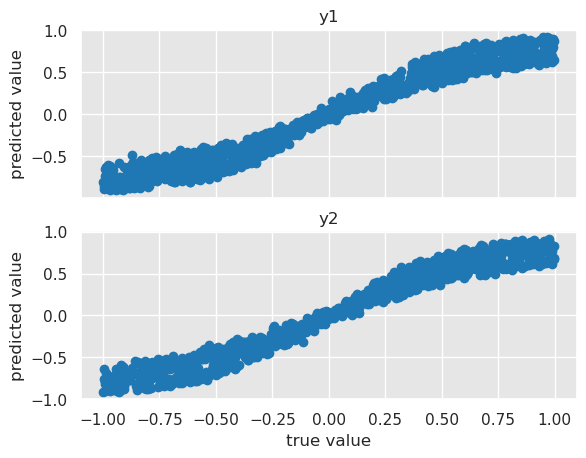

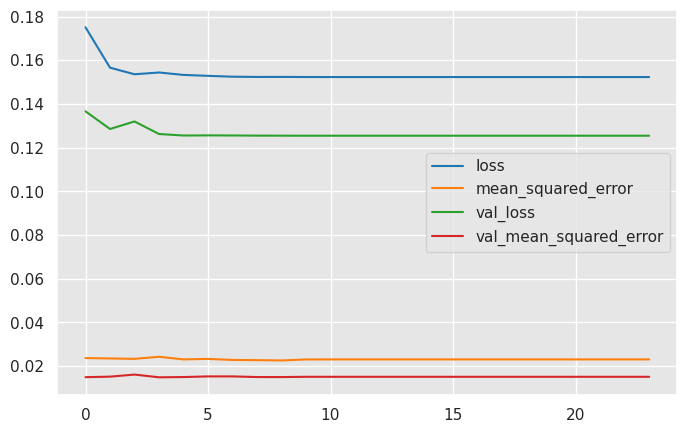

1/1 [==============================] - 0s 14ms/step
[[ 0.          0.        ]
 [-0.39793587  0.39793587]
 [-0.39793587 -0.39793587]
 [ 0.39793587 -0.39793587]
 [ 0.39793587  0.39793587]
 [-0.55928427  0.55928427]
 [ 0.55928427 -0.55928427]
 [-0.61444409  0.61444409]
 [ 0.55928427 -0.55928427]
 [-0.55928427 -0.55928427]]


In [11]:
# Model 3 Equivariant NN - on Normal data
Eqmodel = EqNNmodel.model()
history = Eqmodel.fit(X_train, Y_train,
                    epochs=epochs, 
                    batch_size= batch_size, 
                    verbose=verbose, 
                    validation_data=(X_validation, Y_validation),
                    callbacks=callbacks,
                    # shuffle=True
                    )  
model_eval(Eqmodel, history, X_validation, Y_validation, X_train, Y_train, batch_size, X_test)
Eqmodel.save('ENN_1000_normal.h5',
          overwrite=True)

32/32 [==============================] - 0s 1ms/step
rmse of y1:  0.12645300427888445
rmse of y2:  0.11947707398107006
1/1 [==============================] - 0s 14ms/step
[[ 0.          0.        ]
 [-0.39793587  0.39793587]
 [-0.39793587 -0.39793587]
 [ 0.39793587 -0.39793587]
 [ 0.39793587  0.39793587]
 [-0.55928427  0.55928427]
 [ 0.55928427 -0.55928427]
 [-0.61444409  0.61444409]
 [ 0.55928427 -0.55928427]
 [-0.55928427 -0.55928427]]


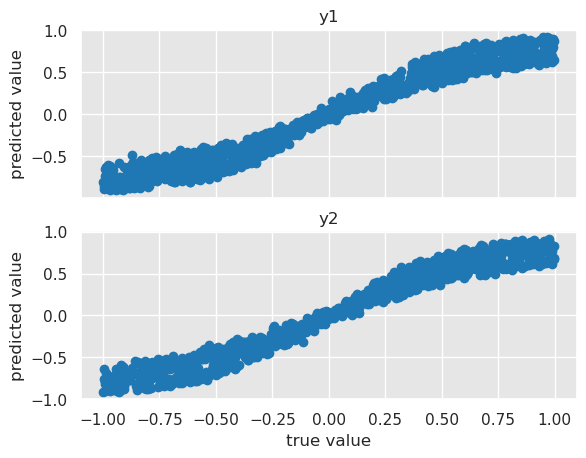

In [12]:
model.get_config()
# models = ['NN_1000_normal.h5','NN_1000_Aug.h5','ENN_1000_normal.h5','ENN_1000_Aug.h5', ]
# for model in models:
from keras.utils import CustomObjectScope

with CustomObjectScope({'EqHidden_layer':EqHidden_layer, 'EqOutput_layer':EqOutput_layer}):
       #soln 1
       # load_model = tf.keras.models.load_model('NN_1000_normal.h5', compile=False)
       load_model = tf.keras.models.load_model('ENN_1000_normal.h5')
       
predictions = load_model.predict(X_validation)
prediction_accuracy(predictions, Y_validation)
evaluate_train = load_model.evaluate(X_train, Y_train, batch_size=batch_size)

# evaluate_train = model.evaluate(X_train, Y_train, batch_size=batch_size)
evaluate_validation = load_model.evaluate(X_validation,Y_validation, batch_size=batch_size)

y_pred = load_model.predict(X_test)
print(y_pred)

Epoch 1/100
250/250 - 1s - loss: 0.2261 - mean_squared_error: 0.0850 - val_loss: 0.1255 - val_mean_squared_error: 0.0151 - 991ms/epoch - 4ms/step
Epoch 2/100
250/250 - 0s - loss: 0.1523 - mean_squared_error: 0.0228 - val_loss: 0.1255 - val_mean_squared_error: 0.0150 - 439ms/epoch - 2ms/step
Epoch 3/100
250/250 - 0s - loss: 0.1522 - mean_squared_error: 0.0228 - val_loss: 0.1255 - val_mean_squared_error: 0.0150 - 450ms/epoch - 2ms/step
Epoch 4/100
250/250 - 1s - loss: 0.1522 - mean_squared_error: 0.0228 - val_loss: 0.1255 - val_mean_squared_error: 0.0150 - 536ms/epoch - 2ms/step
Epoch 5/100
250/250 - 1s - loss: 0.1522 - mean_squared_error: 0.0228 - val_loss: 0.1255 - val_mean_squared_error: 0.0150 - 603ms/epoch - 2ms/step
Epoch 6/100
250/250 - 1s - loss: 0.1522 - mean_squared_error: 0.0228 - val_loss: 0.1255 - val_mean_squared_error: 0.0150 - 524ms/epoch - 2ms/step
Epoch 7/100
250/250 - 1s - loss: 0.1522 - mean_squared_error: 0.0228 - val_loss: 0.1255 - val_mean_squared_error: 0.0150 - 5

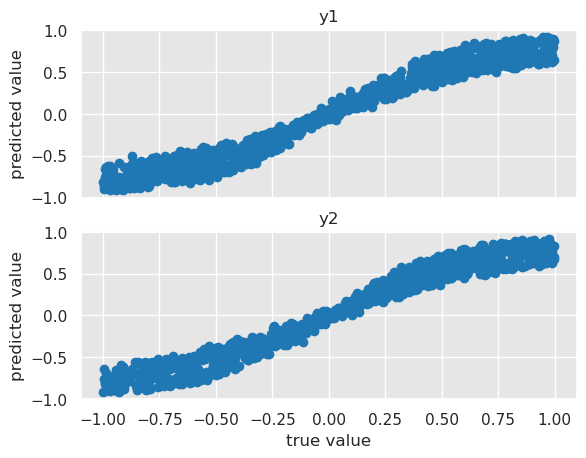

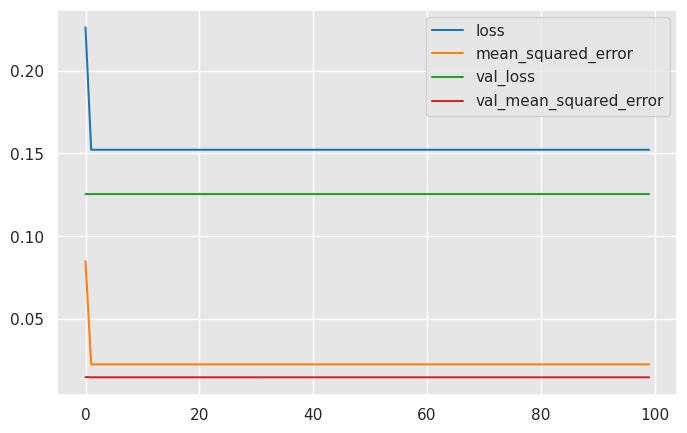

1/1 [==============================] - 0s 16ms/step
[[ 0.          0.        ]
 [-0.40386157  0.40386157]
 [-0.40386157 -0.40386157]
 [ 0.40386157 -0.40386157]
 [ 0.40386157  0.40386157]
 [-0.56651912  0.56651912]
 [ 0.56651912 -0.56651912]
 [-0.62186031  0.62186031]
 [ 0.56651912 -0.56651912]
 [-0.56651912 -0.56651912]]


In [13]:
# Model 4 Equivariant NN - on Augmented data
model = EqNNmodel.model()
history = model.fit(X_train_Aug, Y_train_Aug,
                    epochs=epochs, 
                    batch_size= batch_size, 
                    verbose=verbose, 
                    validation_data=(X_validation, Y_validation),
                    callbacks=callbacks,
                    # shuffle=True
                    )  
model_eval(model, history, X_validation, Y_validation, X_train_Aug, Y_train_Aug, batch_size, X_test)
model.save('ENN_1000_Aug.h5')

32/32 [==============================] - 0s 917us/step
rmse of y1:  0.12588015553173976
rmse of y2:  0.11884416037569563
1/1 [==============================] - 0s 16ms/step
[[ 0.          0.        ]
 [-0.40386157  0.40386157]
 [-0.40386157 -0.40386157]
 [ 0.40386157 -0.40386157]
 [ 0.40386157  0.40386157]
 [-0.56651912  0.56651912]
 [ 0.56651912 -0.56651912]
 [-0.62186031  0.62186031]
 [ 0.56651912 -0.56651912]
 [-0.56651912 -0.56651912]]


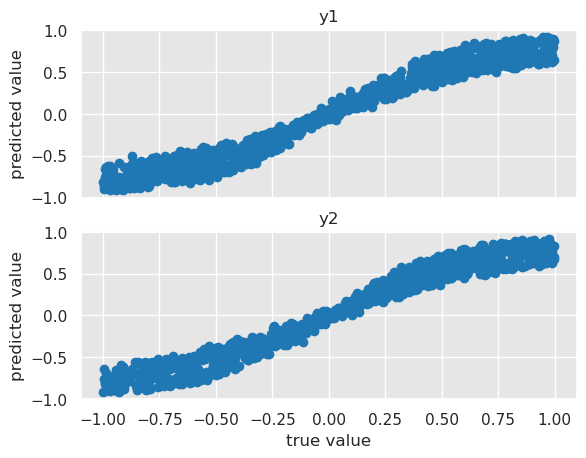

In [14]:
model.get_config()
# models = ['NN_1000_normal.h5','NN_1000_Aug.h5','ENN_1000_normal.h5','ENN_1000_Aug.h5', ]
# for model in models:
from keras.utils import CustomObjectScope

with CustomObjectScope({'EqHidden_layer':EqHidden_layer, 'EqOutput_layer':EqOutput_layer}):
       #soln 1
       # load_model = tf.keras.models.load_model('NN_1000_normal.h5', compile=False)
       load_model = tf.keras.models.load_model('ENN_1000_Aug.h5')
       
predictions = load_model.predict(X_validation)
prediction_accuracy(predictions, Y_validation)
evaluate_train = load_model.evaluate( X_train_Aug, Y_train_Aug, batch_size=batch_size)

# evaluate_train = model.evaluate(X_train, Y_train, batch_size=batch_size)
evaluate_validation = load_model.evaluate(X_validation,Y_validation, batch_size=batch_size)

y_pred = load_model.predict(X_test)
print(y_pred)